In [2]:
#pip install seaborn

In [3]:
#pip install urllib3

In [4]:
#pip install requests

In [5]:
#pip install yfinance

In [6]:
#pip install pystan

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib3
import json
import requests
from pandas.io.json import json_normalize
from datetime import datetime
import yfinance as yf

#Install Dependencies
import tensorflow as tf
from tensorflow import keras
import torch
import re

# import nltk
# from nltk.corpus import stopwords
# from nltk import tokenize
from keras.preprocessing.text import Tokenizer


from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

#statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold
#Model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math



In [8]:
from  prophet import Prophet

In [9]:
news=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_11-12.2022.csv")


In [10]:
news_2=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_dec_jan.csv")

                                                                                    Collect data from yfinance 

In [11]:
sp500=yf.Ticker("^GSPC")

In [12]:
GTHX=yf.Ticker("GTHX")

In [13]:
sp500.get_news()

[{'uuid': '16290702-f8d4-3305-9537-3b4c4bf36a02',
  'title': 'Buy the stock market dip? Why ‘cash’ yielding the most since 2007 could be king',
  'publisher': 'MarketWatch',
  'link': 'https://finance.yahoo.com/m/16290702-f8d4-3305-9537-3b4c4bf36a02/buy-the-stock-market-dip%3F-why.html',
  'providerPublishTime': 1676826060,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/JVm3hyYvKOOVrO1rc6GehA--~B/aD02NDA7dz0xMjgwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/marketwatch.com/173bb13d1624f79593c69173337ba670',
     'width': 1280,
     'height': 640,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/OP.JIwquUiTSlYZBJ8Fbcw--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/marketwatch.com/173bb13d1624f79593c69173337ba670',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['^GSPC']},
 {'uuid': '65444088-cfd0-3425-81f4-64e4e3064c2d',
  'title': 'Dow J

In [14]:
index_price=sp500.history(start="2022-11-01", end="2023-01-12",)

In [15]:
index_price_13m=sp500.history(start="2022-01-01", end="2023-01-31",)
index_price_13m.drop(labels=["Dividends","Stock Splits"],axis=1,inplace=True)
index_price_13m=index_price_13m.tz_localize(None)

In [16]:
index_price.drop(labels=["Dividends","Stock Splits"],axis=1,inplace=True)

In [17]:
index_price=index_price.tz_localize(None)

In [18]:
index_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2022-11-01 to 2023-01-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    49 non-null     float64
 1   High    49 non-null     float64
 2   Low     49 non-null     float64
 3   Close   49 non-null     float64
 4   Volume  49 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.3 KB


                                                                                    DATA WRANGLING & CLEANING 

In [19]:
#index=pd.read_csv

In [20]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10000 non-null  int64 
 1   title         10000 non-null  object
 2   url           10000 non-null  object
 3   description   10000 non-null  object
 4   source        10000 non-null  object
 5   tickers       10000 non-null  object
 6   tags          10000 non-null  object
 7   published_at  10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


In [21]:
news.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [22]:
news_2.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [23]:
news.isna().sum()

title           0
url             0
description     0
source          0
tickers         0
tags            0
published_at    0
dtype: int64

<AxesSubplot:xlabel='source', ylabel='count'>

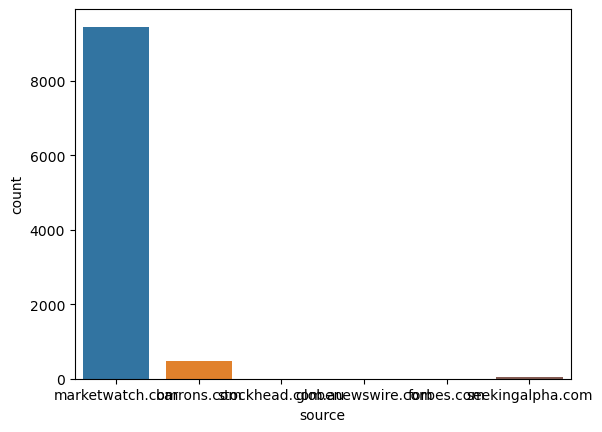

In [24]:
sns.countplot(data=news,x="source")

                                                                            FinBERT test

Test

In [25]:
tokens=tokenizer.encode("wells fargo maintains overweight on agilent technologies raises price target to 95.",return_tensors="pt")
tokens

tensor([[  101,  7051, 23054,  9319,  2058, 11179,  2006, 29003,  3372,  6786,
         13275,  3976,  4539,  2000,  5345,  1012,   102]])

In [26]:
result=model(tokens)
result

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.7195, -1.9257, -0.9715]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [27]:
result.logits

tensor([[ 1.7195, -1.9257, -0.9715]], grad_fn=<AddmmBackward0>)

In [28]:

(torch.argmax(result.logits))+1


tensor(1)

                                                Apllying Model on tittles

In [29]:
def sentiment_score(text):
    tokens=tokenizer.encode(text,return_tensors="pt")
    result=model(tokens)
    return int(torch.argmax(result.logits))+1




In [30]:

#news["sentiment_title"]=news["title"].apply(lambda x:sentiment_score(x[:512]))
#BERT (and many other transformer models) will consume 512 tokens max — truncating anything beyond this length

In [31]:

#news_2["sentiment_title"]=news_2["title"].apply(lambda x:sentiment_score(x[:512]))
#BERT (and many other transformer models) will consume 512 tokens max — truncating anything beyond this length

In [32]:
#news_2.to_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full_2.csv")

In [33]:
#news["sentiment_description"]=news["description"].apply(lambda x:sentiment_score(x[:512]))

In [34]:
news=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full.csv")

In [35]:
news_2=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full_2.csv")

In [36]:
news=news.append(news_2)

/var/folders/0g/qs1_nm7j3n30v6qskgpxqmd80000gn/T/ipykernel_34453/2509051536.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news=news.append(news_2)


In [37]:
news["date"]=pd.to_datetime(news["published_at"]).dt.date


In [38]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20000 non-null  int64  
 1   title                  20000 non-null  object 
 2   url                    20000 non-null  object 
 3   description            20000 non-null  object 
 4   source                 20000 non-null  object 
 5   tickers                20000 non-null  object 
 6   tags                   20000 non-null  object 
 7   published_at           20000 non-null  object 
 8   sentiment_title        20000 non-null  int64  
 9   sentiment_description  10000 non-null  float64
 10  date                   20000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [39]:
news.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [40]:
news.reset_index(inplace=True)

In [41]:
news.drop(labels="index",axis=1,inplace=True)

<AxesSubplot:xlabel='sentiment_description', ylabel='count'>

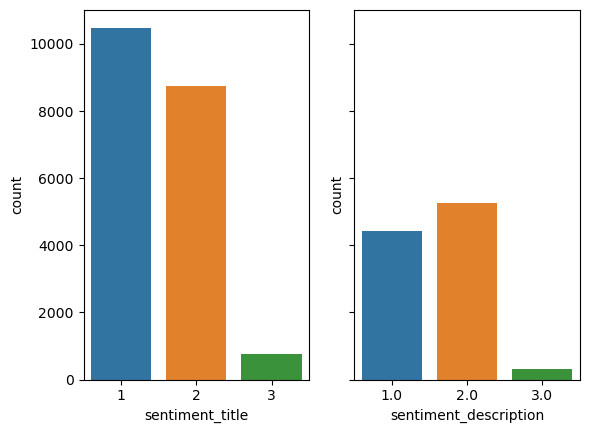

In [42]:
n_subplots=2
sharey=True
fig,axs=plt.subplots(1,n_subplots,sharey=sharey)
sns.countplot(data=news,x="sentiment_title",ax=axs[0])
sns.countplot(data=news,x="sentiment_description",ax=axs[1])



In [43]:
#news.to_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full.csv")

In [44]:
grouped_news=news.loc[:,["date","sentiment_title","sentiment_description"]].groupby(by="date",axis=0,dropna=True,as_index=True).mean()

In [45]:
grouped_news.head()

,sentiment_title,sentiment_description
date,,
2022-11-01,1.800000,1.646154
2022-11-02,1.911765,1.926471
2022-11-03,1.916667,1.816667
2022-11-04,1.843137,1.607843
2022-11-05,2.000000,2.000000


<AxesSubplot:xlabel='date'>

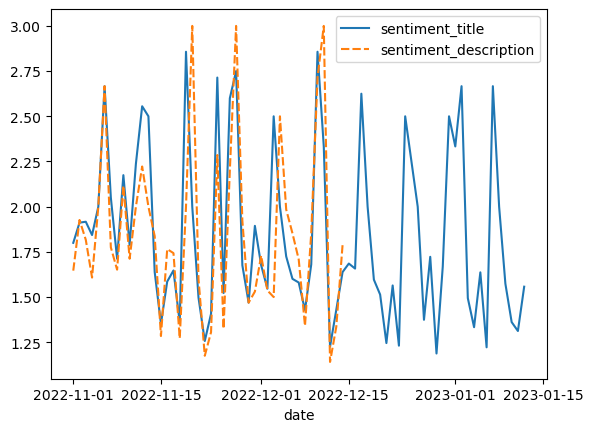

In [46]:
sns.lineplot(data=grouped_news)

In [47]:
index_price.tail(1)

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-11,3932.350098,3970.070068,3928.540039,3969.610107,4303360000


In [48]:
full_data=index_price.join(grouped_news, how="left")

In [49]:
full_data.drop(labels="sentiment_description",axis=1,inplace=True)

In [50]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2022-11-01 to 2023-01-11
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             49 non-null     float64
 1   High             49 non-null     float64
 2   Low              49 non-null     float64
 3   Close            49 non-null     float64
 4   Volume           49 non-null     int64  
 5   sentiment_title  49 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 3.7 KB


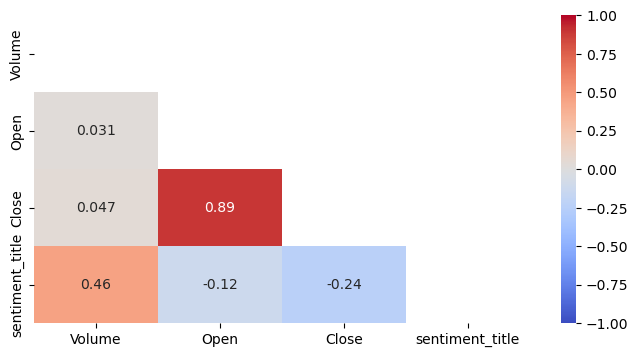

In [51]:
#Correlation matrix

fig,axs=plt.subplots(figsize=(8,4))

corr_data=full_data[["Volume","Open","Close","sentiment_title"]]
# hour_df=hour[["yr","season","holiday","mnth","weekday","orkingday","weathersit","temp","atemp","hum","windspeed","weather_score","casual","registered"]]
matrix_df=corr_data.corr()

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(matrix_df, dtype=bool))

sns.heatmap(data=matrix_df,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=False,annot=True,mask=mask)
plt.show()

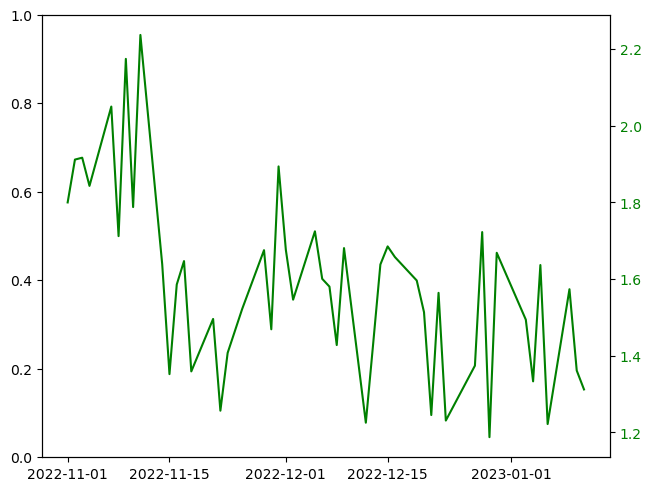

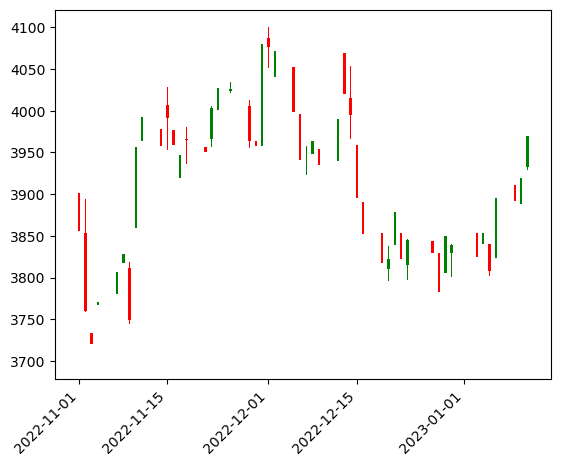

In [52]:

fig, ax = plt.subplots(constrained_layout=True)
plt.figure()
width=.4
width2=.05

up=full_data[full_data.Close>=full_data.Open]
down=full_data[full_data.Close<full_data.Open]

col1="green"
col2="red"

plt.bar(up.index,up.Close -up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High -up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low -up.Open,width2,bottom=up.Open,color=col1)


plt.bar(down.index,down.Close -down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High -down.Open,width2,bottom=down.Open,color=col2)
plt.bar(down.index,down.Low -down.Close,width2,bottom=down.Close,color=col2)

plt.xticks(rotation=45,ha="right")




ax2 = ax.twinx()


ax2.plot(full_data["sentiment_title"], color='green')
ax2.tick_params(axis='y', labelcolor='green')


plt.show()

<AxesSubplot:xlabel='Close', ylabel='sentiment_title'>

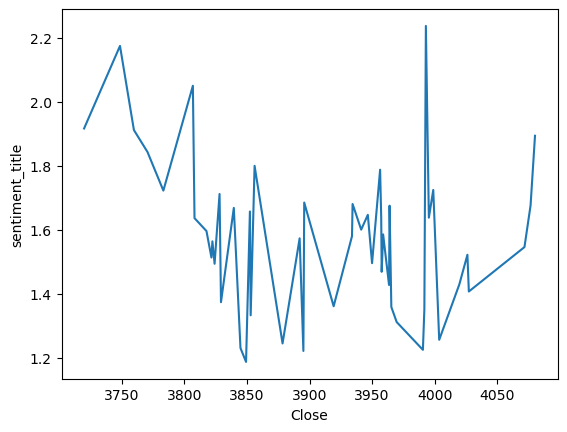

In [53]:
sns.lineplot(data=full_data, x="Close",y="sentiment_title")


                                                                           Classification proplem
                                                                predict the  type of "movement"  based on the sentiment score

Providing Data

In [89]:
ml_data_2=full_data.reset_index()

In [90]:
ml_data_2["Previous_day_close"]=ml_data_2["Close"].shift(periods=1)

In [91]:
change_df_open=ml_data_2.drop(labels=["Date","High","Low","Close","sentiment_title","Volume"],axis=1)

In [92]:
change_df_open=change_df_open.iloc[:,0:2].diff(axis=1,periods=-1)

In [93]:
change_df_open.rename(columns={"Open":"Сhange_price"},inplace=True)

In [94]:
change_df_open.drop(labels="Previous_day_close",axis=1,inplace=True)

In [95]:
ml_data_2=ml_data_2.join(change_df_open,how="left")

In [96]:
ml_data_2.head()

,Date,Open,High,Low,Close,Volume,sentiment_title,Previous_day_close,Сhange_price
0,2022-11-01,3901.790039,3911.790039,3843.800049,3856.100098,4481210000,1.800000,NaN,NaN
1,2022-11-02,3852.899902,3894.439941,3758.679932,3759.689941,4899000000,1.911765,3856.100098,-3.200195
2,2022-11-03,3733.250000,3750.590088,3698.149902,3719.889893,4625290000,1.916667,3759.689941,-26.439941
3,2022-11-04,3766.979980,3796.340088,3708.840088,3770.550049,5400180000,1.843137,3719.889893,47.090088
4,2022-11-07,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,2.050000,3770.550049,10.159912


In [97]:
ml_data_2.dropna(axis=0,inplace=True)

In [98]:
ml_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 1 to 48
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                48 non-null     datetime64[ns]
 1   Open                48 non-null     float64       
 2   High                48 non-null     float64       
 3   Low                 48 non-null     float64       
 4   Close               48 non-null     float64       
 5   Volume              48 non-null     int64         
 6   sentiment_title     48 non-null     float64       
 7   Previous_day_close  48 non-null     float64       
 8   Сhange_price        48 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 3.8 KB


In [100]:
conditions=[(ml_data_2["Сhange_price"]>=0),(ml_data_2["Сhange_price"]<0)]
values=["up","down"]

In [101]:
ml_data_2["movement"]=np.select(conditions,values)

In [102]:
ml_data_2.head()

,Date,Open,High,Low,Close,Volume,sentiment_title,Previous_day_close,Сhange_price,movement
1,2022-11-02,3852.899902,3894.439941,3758.679932,3759.689941,4899000000,1.911765,3856.100098,-3.200195,down
2,2022-11-03,3733.250000,3750.590088,3698.149902,3719.889893,4625290000,1.916667,3759.689941,-26.439941,down
3,2022-11-04,3766.979980,3796.340088,3708.840088,3770.550049,5400180000,1.843137,3719.889893,47.090088,up
4,2022-11-07,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,2.050000,3770.550049,10.159912,up
5,2022-11-08,3817.020020,3859.399902,3786.280029,3828.110107,4607640000,1.712121,3806.800049,10.219971,up


Encoding

In [103]:
enc=LabelEncoder()
ml_data_2["movement_cat"]=enc.fit_transform(ml_data_2["movement"])



In [104]:
ml_data_2.head()

,Date,Open,High,Low,Close,Volume,sentiment_title,Previous_day_close,Сhange_price,movement,movement_cat
1,2022-11-02,3852.899902,3894.439941,3758.679932,3759.689941,4899000000,1.911765,3856.100098,-3.200195,down,0
2,2022-11-03,3733.250000,3750.590088,3698.149902,3719.889893,4625290000,1.916667,3759.689941,-26.439941,down,0
3,2022-11-04,3766.979980,3796.340088,3708.840088,3770.550049,5400180000,1.843137,3719.889893,47.090088,up,1
4,2022-11-07,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,2.050000,3770.550049,10.159912,up,1
5,2022-11-08,3817.020020,3859.399902,3786.280029,3828.110107,4607640000,1.712121,3806.800049,10.219971,up,1


Spliting

In [105]:
X=ml_data_2.iloc[:,6:7]
y=ml_data_2.movement_cat
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38, 1)
(10, 1)
(38,)
(10,)


Standartisation

In [108]:
scX=StandardScaler()
X_test_sc=scX.fit_transform(X_test)
X_train_sc=scX.fit_transform(X_train)

In [109]:
print(X_test_sc)

[[-1.79217824]
 [ 1.82955001]
 [-0.14296615]
 [-1.54974369]
 [ 0.29780165]
 [ 0.72854982]
 [ 0.27922072]
 [ 0.45465892]
 [-0.28595048]
 [ 0.18105744]]


Model fitting

In [110]:
lgr=LogisticRegression()
lgr.fit(X_train_sc,y_train)

LogisticRegression()

Model Prediction

In [111]:
y_predict=lgr.predict(X_test_sc)

Model Evaluation

In [112]:
#Confusion matrix 
label=["up","down"]
cm=confusion_matrix(y_test,y_predict)
pd.DataFrame(cm,index=label,columns=label)

,up,down
up,5,0
down,3,2


In [113]:
print("accuracy_score is",accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict,target_names=["up","down"]))

accuracy_score is 0.7
              precision    recall  f1-score   support

          up       0.62      1.00      0.77         5
        down       1.00      0.40      0.57         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10



Model Improving